**Predict Diabetes From Medical Records**

The [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database) can be used to train machine learning models to predict if a given patient has diabetes.

*Step 1: Import Python Packages*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import graphviz 
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from pandas import read_csv
%matplotlib inline

*Step 2: Define Helper Functions*

In [2]:
def plot_decision_tree(a,b):
    """
    http://scikit-learn.org/stable/modules/tree.html
    """
    dot_data = tree.export_graphviz(a, out_file=None, feature_names=b,class_names=['Healthy','Diabetes'],filled=False, rounded=True,special_characters=False)  
    graph = graphviz.Source(dot_data)  
    return graph 

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

*Step 3: Inspect and Clean Data*

In [3]:
dataset = read_csv('../input/train.csv')
dataset=dataset[['Id','Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']]
dataset.head(10)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,3,1,89,66,23,94,28.1,0.167,21,0
3,4,0,137,40,35,168,43.1,2.288,33,1
4,5,5,116,74,0,0,25.6,0.201,30,0
5,7,10,115,0,0,0,35.3,0.134,29,0
6,8,2,197,70,45,543,30.5,0.158,53,1
7,9,8,125,96,0,0,0.0,0.232,54,1
8,11,10,168,74,0,0,38.0,0.537,34,1
9,12,10,139,80,0,0,27.1,1.441,57,0


In [4]:
dataset2 = dataset.iloc[:, :-1]
print("# of Rows, # of Columns: ",dataset2.shape)
print("\nColumn Name           # of Null Values\n")
print((dataset2[:] == 0).sum())

# of Rows, # of Columns:  (561, 9)

Column Name           # of Null Values

Id                            1
Pregnancies                  76
Glucose                       4
BloodPressure                27
SkinThickness               164
Insulin                     272
BMI                           8
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [5]:
trainingData = read_csv('../input/train.csv') 
trainingData=trainingData[['Id','Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']]
testingData = read_csv('../input/test.csv')
testingData=testingData[['Id','Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
trainingFeatures = trainingData.iloc[:, :-1]
trainingLabels = trainingData.iloc[:, -1]
imputer = SimpleImputer(missing_values=0,strategy='median')
trainingFeatures = imputer.fit_transform(trainingFeatures)
trainingFeatures = pd.DataFrame(trainingFeatures)
trainingFeatures.columns=['Id','Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
testingData = imputer.transform(testingData)
testingData = pd.DataFrame(testingData)
testingData.columns=['Id','Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
print("# of Rows, # of Columns: ",trainingFeatures.shape)
print("\nColumn Name           # of Null Values\n")
print((trainingFeatures[:] == 0).sum())

# of Rows, # of Columns:  (561, 9)

Column Name           # of Null Values

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


*Step 4: Feature Engineering and Feature Selection*

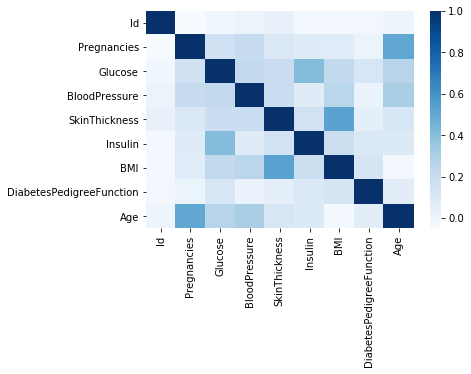

In [6]:
g = sns.heatmap(trainingFeatures.corr(),cmap="Blues",annot=False)

In [7]:
trainingFeatures.corr()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Id,1.000000,-0.049097,-0.012092,0.009878,0.029368,-0.025323,-0.026065,-0.014659,0.007166
Pregnancies,-0.049097,1.000000,0.167959,0.207546,0.102541,0.080773,0.071451,0.010479,0.512079
Glucose,-0.012092,0.167959,1.000000,0.227243,0.187262,0.411437,0.226824,0.125974,0.262691
BloodPressure,0.009878,0.207546,0.227243,1.000000,0.200236,0.079971,0.251286,0.017491,0.305855
SkinThickness,0.029368,0.102541,0.187262,0.200236,1.000000,0.152919,0.529582,0.052178,0.117664
Insulin,-0.025323,0.080773,0.411437,0.079971,0.152919,1.000000,0.181902,0.101191,0.093495
BMI,-0.026065,0.071451,0.226824,0.251286,0.529582,0.181902,1.000000,0.128195,-0.026500
DiabetesPedigreeFunction,-0.014659,0.010479,0.125974,0.017491,0.052178,0.101191,0.128195,1.000000,0.062651
Age,0.007166,0.512079,0.262691,0.305855,0.117664,0.093495,-0.026500,0.062651,1.000000


In [8]:
trainingFeatures2 = trainingFeatures.drop(['Pregnancies','BloodPressure','DiabetesPedigreeFunction', 'Age','SkinThickness','Insulin','Id'], axis=1)

          Glucose       BMI
Glucose  1.000000  0.226824
BMI      0.226824  1.000000


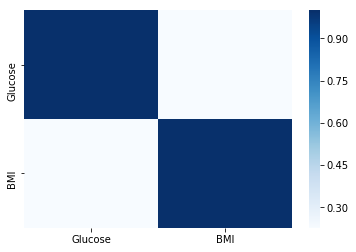

In [9]:
g = sns.heatmap(trainingFeatures2.corr(),cmap="Blues",annot=False)
print(trainingFeatures2.corr())

*Step 5: Evaluate Model*


Feature Importance:

    Feature  absCoefficient
0  Glucose        0.696293
1      BMI        0.303707 



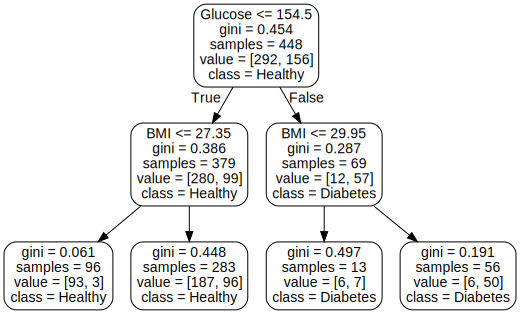

In [10]:
model = DecisionTreeClassifier(max_depth=2,min_samples_leaf=2)
X_train, X_test, y_train, y_test = train_test_split(trainingFeatures2, trainingLabels, test_size=0.2, random_state=1)
model.fit(X_train, y_train)
columns = trainingFeatures2.columns
feature_names = trainingFeatures2.columns.values
coefficients = model.feature_importances_.reshape(trainingFeatures2.columns.shape[0], 1)
absCoefficients = abs(coefficients)
fullList = pd.concat((pd.DataFrame(columns, columns = ['Feature']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('\nFeature Importance:\n\n',fullList,'\n')
plot_decision_tree(model,feature_names)

DecisionTreeClassifier:

Cross_Val_Score: 75.06% (5.10%)


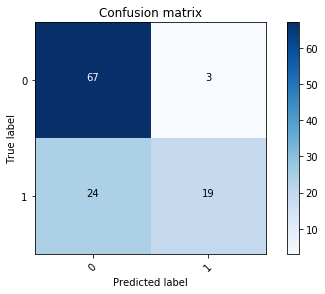

In [11]:
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, trainingFeatures2, trainingLabels, cv=kfold)
print("DecisionTreeClassifier:\n\nCross_Val_Score: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
prediction = model.predict(X_test)
cnf_matrix = confusion_matrix(y_test, prediction)
dict_characters = {0: 'Healthy', 1: 'Diabetes'}
plot_confusion_matrix(cnf_matrix, classes=dict_characters,title='Confusion matrix')

*Step 6: Prepare submission file*

In [12]:
test = testingData
test = pd.DataFrame(test)
test.columns=['Id','Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
test2 = test.drop(['Id','Pregnancies','BloodPressure','DiabetesPedigreeFunction', 'Age','SkinThickness','Insulin'], axis=1)
my_predictions = model.predict(test2)
Identifier = test.Id.astype(int)
my_submission = pd.DataFrame({'Id': Identifier, 'Outcome': my_predictions})
my_submission.to_csv('my_submission.csv', index=False)
my_submission.head()

,Id,Outcome
0,2,1
1,6,0
2,10,0
3,13,1
4,16,0


*Step 7: Submit Results*

1. Click on the "Commit & Run" button in the top right corner of the kernel editor
1. Wait for the kernel to finish running then click on "View Snapshot"
1. Wait for the kernel viewer page to load then click on the "Output" tab
1. Find your submission file in the "Output" tab
1. Click "Submit to Competition" 